In [1]:
#in the name of GOD

In [2]:
import pandas as pd 
import numpy as np
from IPython.display import clear_output
import time
import pickle

import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
import matplotlib.cm as cm
import matplotlib as matplotlib

from fastdtw import fastdtw

def color_map_color(value, cmap_name='coolwarm', vmin=0, vmax=10):
    # norm = plt.Normalize(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = matplotlib.colors.rgb2hex(rgb)
    return color
cl=['r','g','b','c','m','y','k']
color=dict()
for i,el in enumerate(cl):
    color.update({i:el})
#extract the labels for clutering precision its for after clustering
def time_convertor(x):
    s,h,m=0,0,0
    s=round(x%60,2)
    m=int(x/60)
    h=int(m/60)
    m=m%60
    time=str(h)+':'+str(m)+':'+str(s)
    return pd.to_datetime('1970-01-01 '+time)


# Display figures inline in Jupyter notebook
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 5)})

In [3]:
#data_read
#prepare Dataset gyroscope
dfg=pd.read_csv('16\giroscopio_terra.csv')
dfg['ts']=pd.to_datetime(dfg.apply(lambda x:(round((x.uptimeNanos-dfg.uptimeNanos[0])/1000000)*1000000),axis=1))
dm=dfg['ts']
dfg=dfg.drop('uptimeNanos',1).drop('timestamp',1)
dfg=dfg.set_index('ts').rename(columns={'x': 'g-x','y': 'g-y','z': 'g-z'})
#prepare Dataset accelarator
dfa=pd.read_csv('16\\acelerometro_terra.csv')
dfa['ts']=dm
dfa=dfa.drop('uptimeNanos',1).drop('timestamp',1)
dfa=dfa.set_index('ts').rename(columns={'x': 'a-x','y': 'a-y','z': 'a-z'})
df1 = pd.concat([dfa, dfg], axis=1, join='outer')
#prepare Dataset gyroscope
dfg=pd.read_csv('17\giroscopio_terra.csv')
dfg['ts']=pd.to_datetime(dfg.apply(lambda x:(round((x.uptimeNanos-dfg.uptimeNanos[0])/1000000)*1000000),axis=1))
dm=dfg['ts']
dfg=dfg.drop('uptimeNanos',1).drop('timestamp',1)
dfg=dfg.set_index('ts').rename(columns={'x': 'g-x','y': 'g-y','z': 'g-z'})
#prepare Dataset accelarator
dfa=pd.read_csv('17\\acelerometro_terra.csv')
dfa['ts']=dm
dfa=dfa.drop('uptimeNanos',1).drop('timestamp',1)
dfa=dfa.set_index('ts').rename(columns={'x': 'a-x','y': 'a-y','z': 'a-z'})
df2 = pd.concat([dfa, dfg], axis=1, join='outer')
#prepare Dataset gyroscope
dfg=pd.read_csv('20\\giroscopio_terra.csv')
dfg['ts']=pd.to_datetime(dfg.apply(lambda x:(round((x.uptimeNanos-dfg.uptimeNanos[0])/1000000)*1000000),axis=1))
dm=dfg['ts']
dfg=dfg.drop('uptimeNanos',1).drop('timestamp',1)
dfg=dfg.set_index('ts').rename(columns={'x': 'g-x','y': 'g-y','z': 'g-z'})
#prepare Dataset accelarator
dfa=pd.read_csv('20\\acelerometro_terra.csv')
dfa['ts']=dm
dfa=dfa.drop('uptimeNanos',1).drop('timestamp',1)
dfa=dfa.set_index('ts').rename(columns={'x': 'a-x','y': 'a-y','z': 'a-z'})
df3 = pd.concat([dfa, dfg], axis=1, join='outer')
#prepare Dataset gyroscope
dfg=pd.read_csv('21\giroscopio_terra.csv')
dfg['ts']=pd.to_datetime(dfg.apply(lambda x:(round((x.uptimeNanos-dfg.uptimeNanos[0])/1000000)*1000000),axis=1))
dm=dfg['ts']
dfg=dfg.drop('uptimeNanos',1).drop('timestamp',1)
dfg=dfg.set_index('ts').rename(columns={'x': 'g-x','y': 'g-y','z': 'g-z'})
#prepare Dataset accelarator
dfa=pd.read_csv('21\\acelerometro_terra.csv')
dfa['ts']=dm
dfa=dfa.drop('uptimeNanos',1).drop('timestamp',1)
dfa=dfa.set_index('ts').rename(columns={'x': 'a-x','y': 'a-y','z': 'a-z'})
df4 = pd.concat([dfa, dfg], axis=1, join='outer')

In [4]:
label_event_lenght=dict()
#prepare Labeled dataset on 16
dfl=pd.read_csv('16\\groundTruth.csv')
dfl['length']=dfl.en-dfl.st
for event , dft in dfl.groupby('evento'):
    if (event in label_event_lenght):
        label_event_lenght.update({event : label_event_lenght[event]+list(dft.length) })
    else:
        label_event_lenght.update({event : list(dft.length)})
        
dfl['st_time']=dfl.apply(lambda x:time_convertor(x.st) ,axis=1 )
dfl['en_time']=dfl.apply(lambda x:time_convertor(x.en) ,axis=1 )
dfl=dfl.drop('st',1).drop('en',1).drop('length',1)
evented_label_1=list()
for i in range(len(dfl)):
    evented_label_1.append((dfl.iloc[i][0],dfl.iloc[i][1],dfl.iloc[i][2]))
#prepare Labeled dataset on 17
dfl=pd.read_csv('17\\groundTruth.csv')
dfl['length']=dfl.en-dfl.st
for event , dft in dfl.groupby('evento'):
    if (event in label_event_lenght):
        label_event_lenght.update({event : label_event_lenght[event]+list(dft.length) })
    else:
        label_event_lenght.update({event : list(dft.length)})

dfl['st_time']=dfl.apply(lambda x:time_convertor(x.st) ,axis=1 )
dfl['en_time']=dfl.apply(lambda x:time_convertor(x.en) ,axis=1 )
dfl=dfl.drop('st',1).drop('en',1).drop('length',1)
evented_label_2=list()
for i in range(len(dfl)):
    evented_label_2.append((dfl.iloc[i][0],dfl.iloc[i][1],dfl.iloc[i][2]))
#prepare Labeled dataset on 20
dfl=pd.read_csv('20\\groundTruth.csv')
dfl['length']=dfl.en-dfl.st
for event , dft in dfl.groupby('evento'):
    if (event in label_event_lenght):
        label_event_lenght.update({event : label_event_lenght[event]+list(dft.length) })
    else:
        label_event_lenght.update({event : list(dft.length)})

dfl['st_time']=dfl.apply(lambda x:time_convertor(x.st) ,axis=1 )
dfl['en_time']=dfl.apply(lambda x:time_convertor(x.en) ,axis=1 )
dfl=dfl.drop('st',1).drop('en',1).drop('length',1)
evented_label_3=list()
for i in range(len(dfl)):
    evented_label_3.append((dfl.iloc[i][0],dfl.iloc[i][1],dfl.iloc[i][2]))
#prepare Labeled dataset on 21
dfl=pd.read_csv('21\\groundTruth.csv')
dfl['length']=dfl.en-dfl.st
for event , dft in dfl.groupby('evento'):
    if (event in label_event_lenght):
        label_event_lenght.update({event : label_event_lenght[event]+list(dft.length) })
    else:
        label_event_lenght.update({event : list(dft.length)})
dfl['st_time']=dfl.apply(lambda x:time_convertor(x.st) ,axis=1 )
dfl['en_time']=dfl.apply(lambda x:time_convertor(x.en) ,axis=1 )
dfl=dfl.drop('st',1).drop('en',1).drop('length',1)
evented_label_4=list()
for i in range(len(dfl)):
    evented_label_4.append((dfl.iloc[i][0],dfl.iloc[i][1],dfl.iloc[i][2]))

In [5]:
eve1=pd.DataFrame(evented_label_1)
eve1[3]=['evented_label_1' for x in evented_label_1]

eve2=pd.DataFrame(evented_label_2)
eve2[3]=['evented_label_2' for x in evented_label_2]

eve3=pd.DataFrame(evented_label_3)
eve3[3]=['evented_label_3' for x in evented_label_3]

eve4=pd.DataFrame(evented_label_4)
eve4[3]=['evented_label_4' for x in evented_label_4]

evented_label=pd.concat([eve1, eve2,eve3,eve4])

In [6]:
rate=(df2.index[6]-df3.index[5]).total_seconds()
window_list=list()
for event in label_event_lenght:
    window_list.append((event,round(max(label_event_lenght[event])/rate)))
window_list

[('curva_direita_agressiva', 225),
 ('curva_esquerda_agressiva', 225),
 ('evento_nao_agressivo', 225),
 ('troca_faixa_direita_agressiva', 125),
 ('aceleracao_agressiva', 245),
 ('freada_agressiva', 185),
 ('troca_faixa_esquerda_agressiva', 120)]

In [7]:
#supervised
window={226:['curva_direita_agressiva','curva_esquerda_agressiva','aceleracao_agressiva'],
        126:['troca_faixa_direita_agressiva','troca_faixa_esquerda_agressiva'],
        186:['freada_agressiva']
       }

In [10]:
#Dont RUN this part
#we should optimize M
#lengh of random event
from random import gauss

def temp_event_genarator(df,L,i):
    M=round(gauss(0.6,0.5)*L/2)
    temp_event=list()
    pointer=0
    stop=False
    #go on timeserise for event extraction
    while stop!=True:
        clear_output(wait=True)
        pointer=pointer + M
        l_min=pointer-int(L/2)
        l_max=pointer+int(L/2)
        if (l_min<0):
            l_min=0
        if (l_max>len(df)):
            l_max=len(df)
            stop=True
        print('extraction ',l_max/len(df),' % of ',i,' is complete')
        temp_event.append(df[l_min:l_max])
    return temp_event
temp_event=list()
for i,lw in enumerate(window):
    temp_event.append((window[lw],temp_event_genarator(df1,lw,i+1)))

with open("EM_tmp_on16.txt", "wb") as fp:
    pickle.dump(temp_event, fp)


extraction  1.0  % of  3  is complete


In [9]:
#calculate tempevnt with labdeled event
Dum=evented_label.groupby(0).size()
n=0
k=0
t1=time.time()
for L , AEV in temp_event:
    for i in L: 
        k=k+len(AEV)*Dum[i]

EVENT_DS=dict()
for L , AEV in temp_event:
    for eve_name in L:
        Y=list()
        for EV in AEV:
            X=list()
            for eve,dfe in evented_label.groupby(0):
                if eve==eve_name:
                    for el in dfe.iloc:
                        clear_output(wait=True)
                        n=n+1
                        print('disstance calculatoin ',round((n/k)*100,4),' %  is complete')
                        if   el[3]=='evented_label_1':
                            X.append(fastdtw(EV,df1[el[1]:el[2]])[0])
                        elif el[3]=='evented_label_2':
                            X.append(fastdtw(EV,df2[el[1]:el[2]])[0])
                        elif el[3]=='evented_label_3':
                            X.append(fastdtw(EV,df3[el[1]:el[2]])[0])
                        elif el[3]=='evented_label_4':
                            X.append(fastdtw(EV,df4[el[1]:el[2]])[0])
            Y.append(X)
        EVENT_DS.update({eve_name:Y})

t2=time.time()
print(round((t2-t1)/60) ,'min has time for calculaton distant')

with open("EM_DIS_on16.txt", "wb") as fp:
    pickle.dump(EVENT_DS, fp)


disstance calculatoin  100.0  %  is complete
57 min has time for calculaton distant


In [8]:
with open("EM_tmp_on16.txt", "rb") as fp:
    temp_event = pickle.load(fp)
with open("EM_DIS_on16.txt", "rb") as fp:
    EVENT_DS = pickle.load(fp)

In [9]:
EVENT_DS.keys()

dict_keys(['curva_direita_agressiva', 'curva_esquerda_agressiva', 'aceleracao_agressiva', 'troca_faixa_direita_agressiva', 'troca_faixa_esquerda_agressiva', 'freada_agressiva'])

In [576]:
#make it mean for each event from labeld 
med=dict()
for eve in EVENT_DS:
    x=list()
    for ev in EVENT_DS[eve]:
        x.append(np.mean(ev))
    med.update({eve:x})

#export relevent with thease two parameter
def export_relevent_index(name,threshold=3,window=10):
    X=med[name].copy()
    X.sort()
    relevent=list()
    dfr=[X[i+1]-X[i] for i in range(len(X)-1)]
    for i,el in enumerate(X):
        Criterion=np.mean(dfr[i:i+window])
        if Criterion>threshold:
            relevent.append(el)
        else:
            break
    return [med[name].index(x)for x in relevent]

indexes=dict()
for name in EVENT_DS:
    indexes.update({name:export_relevent_index(name)})

In [577]:
def has_overlap(A_start, A_end, B_start, B_end):
    latest_start = max(A_start, B_start)
    earliest_end = min(A_end, B_end)
    return latest_start <= earliest_end

#Done = dict.fromkeys(ini_set, 0) 
Done=list()
for name in indexes:
    if name in {x[0] for x in evented_label_1}:
        for i in range(0,3):
            if name in temp_event[i][0]:
                for Index in indexes[name]:
                    sta=temp_event[i][1][Index].index[0]
                    ena =temp_event[i][1][Index].index[-1]
                    el=[(j,x[1],x[2]) for j,x in enumerate(evented_label_1) if x[0]==name]
                    for jj,stb,enb in el:
                        if has_overlap(sta,ena,stb,enb):
                            Done.append((name,jj,Index))
print(len(Done),'event has extract')

21 event has extract


In [581]:
events=[x[2] for x in Done if x[0]=='curva_esquerda_agressiva']

num=indexes['curva_esquerda_agressiva'].index(events[-1])
my_pridict=indexes['curva_esquerda_agressiva'][0:num]

accuracy=len(events)/len(my_pridict)
print('accuracy is : ',accuracy)

accuracy is :  0.875


now we should cheack to in wich case we can have the best accuracy

In [910]:
resualt=dict()
for k in range(1,60):
    indexes=dict()
    for name in EVENT_DS:
        indexes.update({name:export_relevent_index(name,threshold=k/10,window=10)})
    Done=list()
    for name in indexes:
        if name in {x[0] for x in evented_label_1}:
            for i in range(0,3):
                if name in temp_event[i][0]:
                    for Index in indexes[name]:
                        sta=temp_event[i][1][Index].index[0]
                        ena =temp_event[i][1][Index].index[-1]
                        el=[(j,x[1],x[2]) for j,x in enumerate(evented_label_1) if x[0]==name]
                        for jj,stb,enb in el:
                            if has_overlap(sta,ena,stb,enb):
                                Done.append((name,jj,Index))

    
    accuracy=list()
    for name in {x[0] for x in Done}:
        events=[x[2] for x in Done if x[0]==name]
        num=indexes[name].index(events[-1])
        my_pridict=indexes[name]
        if len(my_pridict) ==0:
            acc=0
        else:
            acc=len(events)/len(my_pridict)
        real_index_events=list({x[1] for x in Done if x[0]==name})
        real_labeled_index_event=[i for i,x in enumerate(evented_label_1) if x[0]==name]
        chacc=(len(real_index_events)/len(real_labeled_index_event))
        
        accuracy.append((name,acc,chacc))
        
    resualt.update({k/10:(accuracy)})

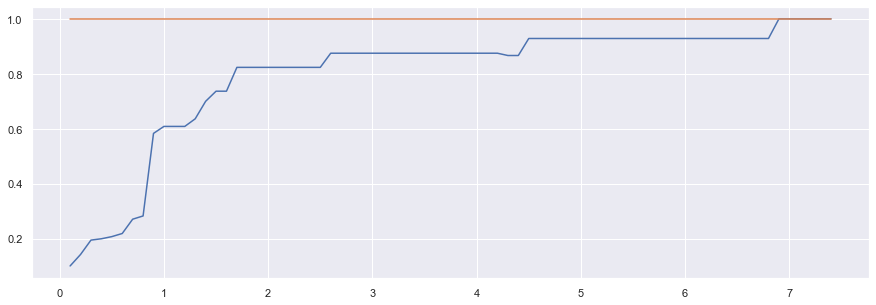

In [901]:
plt.plot(list(resualt.keys()),[resualt[x][0][1] for x in resualt])
plt.plot(list(resualt.keys()),[resualt[x][0][2] for x in resualt])
plt.show()

In [903]:
threshold=7.5
indexes=dict()
for name in EVENT_DS:
    indexes.update({name:export_relevent_index(name,threshold=7.5,window=10)})
Done=list()
for name in indexes:
    if name in {x[0] for x in evented_label_1}:
        for i in range(0,3):
            if name in temp_event[i][0]:
                for Index in indexes[name]:
                    sta=temp_event[i][1][Index].index[0]
                    ena =temp_event[i][1][Index].index[-1]
                    el=[(j,x[1],x[2]) for j,x in enumerate(evented_label_1) if x[0]==name]
                    for jj,stb,enb in el:
                        if has_overlap(sta,ena,stb,enb):
                            Done.append((name,jj,Index))

print('threshold is : ',threshold)
name='curva_direita_agressiva'
my_pridict=indexes[name]
my_pridict.sort()
true_predict=[x[2] for x in Done if x[0]==name]
true_predict.sort()
print(name)

if len(my_pridict) ==0:
    acc=0
else:
    acc=len(true_predict)/len(my_pridict)

print('accuracy:',acc,'\n my predict    ',my_pridict,'\n true predict :',true_predict)

real_index_events=list({x[1] for x in Done if x[0]==name})
real_labeled_index_event=[i for i,x in enumerate(evented_label_1) if x[0]==name]

print(' comprehensivity accuracy: ',len(real_index_events)/len(real_labeled_index_event),'\n predicted events:',real_index_events,'\n real events:     ',real_labeled_index_event)

threshold is :  7.5
curva_direita_agressiva
accuracy: 1.0 
 my predict     [17, 18, 19, 85, 86, 524, 525, 526, 751, 752, 753, 876, 877] 
 true predict : [17, 18, 19, 85, 86, 524, 525, 526, 751, 752, 753, 876, 877]
 comprehensivity accuracy:  1.0 
 predicted events: [1, 3, 8, 10, 11] 
 real events:      [1, 3, 8, 10, 11]


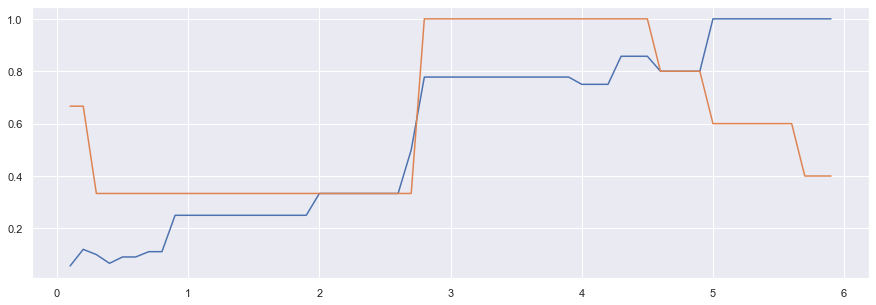

In [911]:
plt.plot(list(resualt.keys()),[resualt[x][1][1] for x in resualt])
plt.plot(list(resualt.keys()),[resualt[x][1][2] for x in resualt])
plt.show()

In [857]:
threshold=4.5
indexes=dict()
for name in EVENT_DS:
    indexes.update({name:export_relevent_index(name,threshold=4.5,window=10)})
Done=list()
for name in indexes:
    if name in {x[0] for x in evented_label_1}:
        for i in range(0,3):
            if name in temp_event[i][0]:
                for Index in indexes[name]:
                    sta=temp_event[i][1][Index].index[0]
                    ena =temp_event[i][1][Index].index[-1]
                    el=[(j,x[1],x[2]) for j,x in enumerate(evented_label_1) if x[0]==name]
                    for jj,stb,enb in el:
                        if has_overlap(sta,ena,stb,enb):
                            Done.append((name,jj,Index))
print('threshold is : ',threshold)
name='curva_esquerda_agressiva'
my_pridict=indexes[name]
my_pridict.sort()
true_predict=[x[2] for x in Done if x[0]==name]
true_predict.sort()
print(name)
print('accuracy:',len(true_predict)/len(my_pridict),'\n my predict    ',my_pridict,'\n true predict :',true_predict)

real_index_events=list({x[1] for x in Done if x[0]==name})
real_labeled_index_event=[i for i,x in enumerate(evented_label_1) if x[0]==name]

print(' comprehensivity accuracy: ',len(real_index_events)/len(real_labeled_index_event),'\n predicted events:',real_index_events,'\n real events:     ',real_labeled_index_event)

threshold is :  4.5
curva_esquerda_agressiva
accuracy: 0.8571428571428571 
 my predict     [221, 222, 312, 443, 582, 670, 972] 
 true predict : [221, 222, 312, 443, 670, 972]
 comprehensivity accuracy:  1.0 
 predicted events: [4, 5, 7, 9, 12] 
 real events:      [4, 5, 7, 9, 12]


In [921]:
indexes=dict()
for name in EVENT_DS:
    indexes.update({name:export_relevent_index(name,threshold=0.25,window=10)})
Done=list()
for name in indexes:
    if name in {x[0] for x in evented_label_1}:
        for i in range(0,3):
            if name in temp_event[i][0]:
                for Index in indexes[name]:
                    sta=temp_event[i][1][Index].index[0]
                    ena =temp_event[i][1][Index].index[-1]
                    el=[(j,x[1],x[2]) for j,x in enumerate(evented_label_1) if x[0]==name]
                    for jj,stb,enb in el:
                        if has_overlap(sta,ena,stb,enb):
                            Done.append((name,jj,Index))
print('threshold is : ',threshold)
name='troca_faixa_direita_agressiva'
my_pridict=indexes[name]
my_pridict.sort()
true_predict=[x[2] for x in Done if x[0]==name]
true_predict.sort()
print(name)
print('accuracy:',len(true_predict)/len(my_pridict),'\n my predict    ',my_pridict,'\n true predict :',true_predict)

real_index_events=list({x[1] for x in Done if x[0]==name})
real_labeled_index_event=[i for i,x in enumerate(evented_label_1) if x[0]==name]

print(' comprehensivity accuracy: ',len(real_index_events)/len(real_labeled_index_event),'\n predicted events:',real_index_events,'\n real events:     ',real_labeled_index_event)

threshold is :  7.5
troca_faixa_direita_agressiva
accuracy: 0.125 
 my predict     [83, 89, 90, 127, 136, 137, 150, 177, 230, 247, 267, 270, 325, 569, 660, 707, 714, 755, 761, 762, 774, 784, 787, 797] 
 true predict : [755, 761, 762]
 comprehensivity accuracy:  0.6666666666666666 
 predicted events: [14, 15] 
 real events:      [13, 14, 15]


In [12]:
import winsound
def end ():
    for i in range (3):
        frequency = 2500  # Set Frequency To 2500 Hertz
        duration = 500  # Set Duration To 1000 ms == 1 second
        winsound.Beep(frequency, duration)
        frequency = 500  # Set Frequency To 2500 Hertz
        duration = 500  # Set Duration To 1000 ms == 1 second
        winsound.Beep(frequency, duration)
        frequency = 1000  # Set Frequency To 2500 Hertz
        duration = 500  # Set Duration To 1000 ms == 1 second
        winsound.Beep(frequency, duration)
    frequency = 1000  # Set Frequency To 2500 Hertz
    duration = 5000  # Set Duration To 1000 ms == 1 second
    winsound.Beep(frequency, duration)
end()

In [ ]:

#nagayidam

def has_overlap(A_start, A_end, B_start, B_end):
    latest_start = max(A_start, B_start)
    earliest_end = min(A_end, B_end)
    return latest_start <= earliest_end

done=list()


labels={x[0] for x in evented_label_1}
labels.remove('evento_nao_agressivo')
labels.remove('troca_faixa_direita_agressiva')
for index,(name,sta,ena) in enumerate([x for x in evented_label_1 if x[0]in labels ]):
    if name in indexes:
        for i in range(0,3):
            if name in temp_event[i][0]:
                for Name in indexes:
                    if Name==name:
                        for Index in indexes[name]:
                            stb=temp_event[i][1][Index].index[0]
                            enb =temp_event[i][1][Index].index[-1]
                            if has_overlap(sta,ena,stb,enb):
                                done.append((Name,index,Index))
